In [1]:
## Capstone Project Notebook

--2020-07-07 23:53:13--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-07-07 23:53:13 (12.0 MB/s) - ‘loan_train.csv’ saved [23101/23101]

   Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30       9/8/2016   
1           2             2     PAIDOFF       1000     30       9/8/2016   
2           3             3     PAIDOFF       1000     15       9/8/2016   
3           4             4     PAIDOFF       1000 

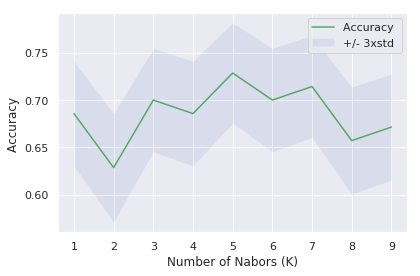

The best accuracy was with 0.7285714285714285 with k= 5


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import csv
import time
import datetime

sns.set()
from sklearn.cluster import KMeans
from sklearn import metrics

!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

fields = ['unamed: 0','unamed: 0.1','loan_status','Principal','terms','effective_date','due_date','age','education','gender']



## Converting Data to numeric values. 

df = pd.read_csv('loan_train.csv')
print(df.head())


with open('loan_train.csv','r') as csv_file:
        with open('data_file.csv','w') as file:
            writer= csv.writer(file)
            writer.writerow(fields)
            csv_reader = csv.reader(csv_file)
            i = 0
            for row in csv_reader:
                #if i == 1 :
                   # writer.writerow(row)

                if i > 0 :
                   # print(row)
                    j = 0
                    for k in row:
                        if j == 0:
                            zero = row[j]
                           # print(zero)
                        if  j == 1:
                            one = row[j]
                            #print(one)
                        if j == 2:
                            if row[j] == "PAIDOFF":
                                two = 1
                            else:
                                #collection
                                two = 0
                            #print(two)

                        if j == 3:
                            three = row[j]
                            #print(three)
                        if j == 4:
                            fourth = row[j]
                           # print(fourth)
                           # print(row[j])
                        if j == 5:
                            fifth = row[j]
                            dt = datetime.datetime.strptime(row[j], "%m/%d/%Y")
                            fifth = time.mktime(dt.timetuple())
                        if j == 6:
                            #sixth = row[j]
                            #my_date = datetime.strptime()
                            #print(row[j])
                            dt =datetime.datetime.strptime(row[j],"%m/%d/%Y")
                            sixth = time.mktime(dt.timetuple())
                            #print(sixth)

                        if j == 7:
                            seven = row[j]
                        if j == 8:
                            if row[j] == "Bechalor":
                                eight = 0
                            if row[j] == "High School or Below":
                                eight = 1
                            if row[j] == "college":
                                eight = 2
                        if j == 9:
                            if row[j] == "male":
                                nine = 1
                            else:
                                nine = 0


                      # print(row[j])
                        j = j + 1
                    #print(zero,one,two,three,fourth,fifth,sixth,seven,eight,nine)
                    writer.writerow([zero,one,two,three,fourth,fifth,sixth,seven,eight,nine])

                i = i + 1
####

df = pd.read_csv('data_file.csv')
print(df.head())


X = df[['Principal','terms','effective_date','due_date','education','age']].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

#Normalize Values.
Y =  df['loan_status'].values
df['loan_status'].value_counts()


#Splitting the data into training and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

print('Train set:',X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


In [11]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

data = pd.read_csv("loan_train.csv",delimiter=",")   
print(data[0:5])

X= data[['Unnamed: 0','Unnamed: 0.1','loan_status','Principal','terms','effective_date','due_date','age','education','Gender']].values
X[0:10]

from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['male','female'])
X[:,9] = le_sex.transform(X[:,9])


le_education = preprocessing.LabelEncoder()
le_education.fit(['High School or Below','college','Bechalor'])
X[:,8] = le_sex.transform(X[:,8])



le_terms = preprocessing.LabelEncoder()
le_terms.fit(['30','15','7'])
X[:,4] = le_sex.transform(X[:,4])

le_Principal = preprocessing.LabelEncoder()
le_Principal.fit(['1000','800','300','900','500'])
X[:,3] = le_Principal.transform(X[:,3])


y = data['loan_status']

y[0:10]


from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.4, random_state=3)


statusTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
statusTree # it shows the default parameters
statusTree.fit(X_trainset,y_trainset)

predTree = statusTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

--2020-07-06 18:52:06--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-07-06 18:52:07 (13.0 MB/s) - ‘loan_train.csv’ saved [23101/23101]

   Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30       9/8/2016   
1           2             2     PAIDOFF       1000     30       9/8/2016   
2           3             3     PAIDOFF       1000     15       9/8/2016   
3           4             4     PAIDOFF       1000 

ValueError: y contains previously unseen labels: 'High School or Below'

In [17]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import time
import datetime

fields = ['Unnamed: 0','Unnamed: 0.1','loan_status','Principal','terms','effective_date','due_date','age','education','gender']


!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
## Converting Data to numeric values. 

df = pd.read_csv('loan_train.csv')
#print(df.head())


with open('loan_train.csv','r') as csv_file:
        with open('data_file.csv','w') as file:
            writer= csv.writer(file)
            writer.writerow(fields)
            csv_reader = csv.reader(csv_file)
            i = 0
            for row in csv_reader:
                #if i == 1 :
                   # writer.writerow(row)

                if i > 0 :
                    #print(row)
                    j = 0
                    for k in row:
                        if j == 0:
                            zero = row[j]
                           # print(zero)
                        if  j == 1:
                            one = row[j]
                            #print(one)
                        if j == 2:
                            if row[j] == "PAIDOFF":
                                two = 1
                            else:
                                #collection
                                two = 0
                        

                        if j == 3:
                            three = row[j]
                         
                        if j == 4:
                            fourth = row[j]
                    
                        if j == 5:
                            fifth = row[j]
                            dt = datetime.datetime.strptime(row[j], "%m/%d/%Y")
                            fifth = time.mktime(dt.timetuple())
                        if j == 6:
                        
                            dt =datetime.datetime.strptime(row[j],"%m/%d/%Y")
                            sixth = time.mktime(dt.timetuple())
                            #print(sixth)

                        if j == 7:
                            seven = row[j]
                        if j == 8:
                            if row[j] == "Bechalor":
                                eight = 0
                            if row[j] == "High School or Below":
                                eight = 1
                            if row[j] == "college":
                                eight = 2
                        if j == 9:
                            if row[j] == "male":
                                nine = 1
                            else:
                                nine = 0


                        j = j + 1
                    #print(zero,one,two,three,fourth,fifth,sixth,seven,eight,nine)
                    writer.writerow([zero,one,two,three,fourth,fifth,sixth,seven,eight,nine])

                i = i + 1
####

df = pd.read_csv('data_file.csv')
(df.head())

df = df[['Unnamed: 0','Unnamed: 0.1','loan_status','Principal','terms','effective_date','due_date','age','education','gender']]
df['loan_status'] = df['loan_status'].astype('int')
df.head()

X = np.asarray(df[['Unnamed: 0','Unnamed: 0.1','loan_status','Principal','terms','effective_date','due_date','age','education','gender']])
X[0:5]

y = np.asarray(df['loan_status'])
y [0:5]

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
print(yhat)
yhat_prob = LR.predict_proba(X_test)
print(yhat_prob)
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test,yhat))


--2020-07-07 23:48:14--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-07-07 23:48:14 (13.2 MB/s) - ‘loan_train.csv’ saved [23101/23101]

Train set: (276, 10) (276,)
Test set: (70, 10) (70,)
[1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1]
[[0.22760599 0.77239401]
 [0.17713362 0.82286638]
 [0.31391781 0.68608219]
 [0.29174759 0.70825241]
 [0.26284135 0.73715865]
 [0.3080841  0.6919159 ]
 [0.84318

In [24]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

fields = ['Unnamed: 0','Unnamed: 0.1','loan_status','Principal','terms','effective_date','due_date','age','education','gender']


!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
## Converting Data to numeric values. 

df = pd.read_csv('loan_train.csv')
#print(df.head())


with open('loan_train.csv','r') as csv_file:
        with open('data_file.csv','w') as file:
            writer= csv.writer(file)
            writer.writerow(fields)
            csv_reader = csv.reader(csv_file)
            i = 0
            for row in csv_reader:
                #if i == 1 :
                   # writer.writerow(row)

                if i > 0 :
                    #print(row)
                    j = 0
                    for k in row:
                        if j == 0:
                            zero = row[j]
                           # print(zero)
                        if  j == 1:
                            one = row[j]
                            #print(one)
                        if j == 2:
                            if row[j] == "PAIDOFF":
                                two = 1
                            else:
                                #collection
                                two = 0
                        

                        if j == 3:
                            three = row[j]
                         
                        if j == 4:
                            fourth = row[j]
                    
                        if j == 5:
                            fifth = row[j]
                            dt = datetime.datetime.strptime(row[j], "%m/%d/%Y")
                            fifth = time.mktime(dt.timetuple())
                        if j == 6:
                        
                            dt =datetime.datetime.strptime(row[j],"%m/%d/%Y")
                            sixth = time.mktime(dt.timetuple())
                            #print(sixth)

                        if j == 7:
                            seven = row[j]
                        if j == 8:
                            if row[j] == "Bechalor":
                                eight = 0
                            if row[j] == "High School or Below":
                                eight = 1
                            if row[j] == "college":
                                eight = 2
                        if j == 9:
                            if row[j] == "male":
                                nine = 1
                            else:
                                nine = 0


                        j = j + 1
                    #print(zero,one,two,three,fourth,fifth,sixth,seven,eight,nine)
                    writer.writerow([zero,one,two,three,fourth,fifth,sixth,seven,eight,nine])

                i = i + 1
####

df = pd.read_csv('data_file.csv')
(df.head())

df = df[pd.to_numeric(df['Unnamed: 0'], errors='coerce').notnull()]
df['Unnamed: 0'] = df['Unnamed: 0'].astype('int')
df.dtypes

df = df[pd.to_numeric(df['Unnamed: 0.1'], errors='coerce').notnull()]
df['Unnamed: 0.1'] = df['Unnamed: 0.1'].astype('int')
df.dtypes

feature_df = df[['Principal','terms','effective_date','due_date','age','education','gender']]
X = np.asarray(feature_df)
X[0:5]

df['loan_status'] = df['loan_status'].astype('int')
y = np.asarray(df['loan_status'])
y[0:5]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)

yhat = clf.predict(X_test)
yhat[0:5]

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,yhat)
    

--2020-07-08 02:01:38--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-07-08 02:01:38 (11.9 MB/s) - ‘loan_train.csv’ saved [23101/23101]

--2020-07-08 02:01:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.2

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6571428571428571